# Calcul des forces de pression sur une digue

Une digue est un petit barrage permettant de retenir une étendue d'eau (mer, lac, rivière) par exemple pour protéger des habitations ou des installations en zone inondable. 

Dans ce mini-projet vous allez calculer numériquement les forces appliquées à une digue de forme arbitraire.

# Introduction : Dans ce mini-projet, nous allons étudier comment former une digue optimale pour retenir de l'eau.

a. Faites un bilan des forces appliquées à la digue en 2D. Quelle force permet à la digue de ne pas glisser sur le sol rocheux ?

$\sum F=Fx+Fy=Peau(x)+Rx+Fg+Peau(y)+Ry$

b. Rappelez l'expression de la pression hydrostatique dans l'eau $P_{eau} (x)$ en fonction de la hauteur par rapport au sol $x$.

$Peau(x) = \rho g(h-y)$

c. Rappelez la (les) équation(s) d'équilibre statique de la digue.

$\sum Fx = 0$

$\sum Fy = 0$

### Modélisation


On définit donc :

* une fonction croissante $f_{air}(y)$ représentant l'interface air-béton définie pour $0 \leq y \leq H$ et allant de $x_a$ à $0$,
* une autre fonction décroissante $f_{eau}(y)$ représentant l'interface eau-béton définie sur le même intervalle et allant de $x_e$ à $0$. 

On ne considérera ici que des fonctions monotones.

On donne l'expression de la courbe côté eau pour une digue représentée par une fonction affine :

$$
f_{air}(y) = -\frac{x_a}{H}.(y-H)
$$

d. Donnez l'expression de la fonction côté air dans le cas d'une fonction affine, et tracez-la avec le code suivant.

$-(y - H) * xe / H$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

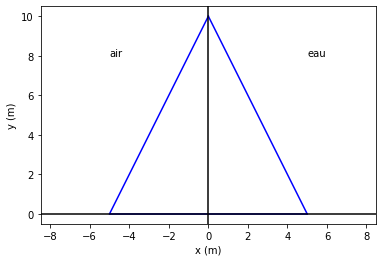

In [2]:
# Ce code permet d'afficher les courbes représentant la digue

H = 10
xa = -5
xe = +5


# On définit les fonctions côté eau et côté air, ici les courbes concaves
def fair(y):
    return -(y - H) * xa / H

def feau(y):
    return  -(y - H) * xe / H

# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(fair(y), y, '-b') 
plt.plot(feau(y), y, '-b')  
 
plt.plot([xe, xa], [0, 0], '-b') # Bas de la digue
plt.xlabel('x (m)') 
plt.ylabel('y (m)')
plt.text(xe, 8, 'eau')
plt.text(xa, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

On rappelle que l'angle $\theta$ entre la tangente en un point et l'axe des abscisses (voir schéma ci-dessus) est relié à la dérivée de la courbe par :

$$
tan(\theta) = f'(y)
$$

Les vecteurs $\vec t$ et $\vec n$ sont alors donnés par :

$$
\vec t = \cos(\theta).\vec{u_y} + \sin(\theta).\vec{u_x}
$$

$$
\vec n = \sin(\theta).\vec{u_y} - \cos(\theta).\vec{u_x} 
$$


Pour pouvoir calculer la résultante des forces de pression sur une surface de forme arbitraire, il nous faut intégrer les forces infinitésimales $\vec{\mathrm{d}F}$ s'appliquant à chaque élément de surface $\mathrm{d}S$. Comme nous sommes en deux dimensions, nous pouvons simplifier le problème en considérant que l'élément de surface est $\mathrm{d}S = L \mathrm{d}l$, avec $L = 1$ la longueur unitaire de la digue suivant $z$, ce qui nous ramène à une intégrale 1D (on n'écrira pas $L$ dans la suite).

On obtient donc, pour l'interface eau-béton :

$$
\vec{F} = \iint_S \vec{\mathrm{d}F} =\int_0^H P(y) \mathrm{d}l . \vec{n}
$$

avec $\vec{n}$ le vecteur normal rentrant au point de coordonnées $(f(y),y)$, et $\mathrm{d}l$ la longueur infinitésimale de la courbe pour une variation $\mathrm{d}x$. On montre facilement la relation avec l'angle $\theta$ défini avant :

$$
\mathrm{d}l = \frac{\mathrm{d}y}{\cos(\theta)}
$$

### Cas des digues en pentes droites

a. Calculez le volume de la digue par intégration de la largeur de la digue en fonction de $y$. Comparez avec le calcul analytique (ici, l'aire du triangle multipliée par la longueur $L=1$). En déduire la force de gravité exercée sur la digue.

In [3]:
import scipy.integrate as sp

aire_feau = np.array(sp.quad(feau, -5, 0))
aire_fair = np.array(sp.quad(fair, 0, 5))
aire_digue = np.add(aire_feau, -aire_fair)

print(aire_digue)

[5.00000000e+01 1.38777878e-13]


Valeur analytique = H+B/2 = 50 (mètre cube)
On obtient donc le même résultat numérique et analytique

Fg =-mg

$m=\rho*V=3000*50$

Fg = -1 471 500 N

b. Pour le cas des fonctions affines, calculez la résultante (vectorielle ; il y a une composante suivant $x$ et une composante suivant $y$) des forces de pression côté eau. On prendra $x_a = -5$, $x_e = +5$, $H=10$. (On ne cherchera pas à faire le calcul analytique !)

In [4]:
xa = -5
xe = 5
H = 10
rho_digue = 3000
rho_eau = 1000
g = 9.81

def Peau(H, y): 
    return rho_eau* g* (H - y)
def deriv_Peau(H, xe): 
    return -xe/H 

def Int_milieu(x, y):                      #Calcul intégral méthode point milieu
    N = len(x)
    somme = 0
    for i in range(0, N - 1):
        dx = x[i + 1] - x[i]
        somme = somme + y[i] * dx
    return somme

Fpeau_y = Int_milieu(y, Peau(H, y) * deriv_Peau(H, xe)) 
Fpeau_x = Int_milieu(y, -Peau(H, y)) 

print('Fpeau_y:', Fpeau_y,'Fpeau_x:', Fpeau_x)

Fpeau_y: -245495.49549549547 Fpeau_x: -490990.99099099095


c. En supposant que la digue est en équilibre statique translationnel, calculez avec le principe fondamental de la dynamique les deux composantes (normale et tangentielle) de la force de réaction du sol, puis le rapport de ces composantes $T/N$. En considérant le coefficient de frottement roche/béton de 0.5, la digue est-elle en équilibre translationnel ?

In [5]:
Fg = -1471500
N = Fpeau_y + Fg
T = Fpeau_x

print('N:', N, 'T:', T)
print('T/N:', T/N)

N: -1716995.4954954954 T: -490990.99099099095
T/N: 0.2859593937660852


La roche est en équilibre car T/N est inférieur à O,5.

d. Reprenez le calcul du rapport $T/N$ et du volume de béton en imposant $x_a=-5$ et $x_e=0$. La digue est-elle stable ? (Il sera utile d'écrire une fonction résumant les calculs des questions a. b. c.)

In [6]:
xai = 0
xei = 5
H = 10
rho_digue = 3000
rho_eau = 1000
g = 9.81

def fairi(y):
    return -(y - H) * xai / H

def feaui(y):
    return  -(y - H) * xei / H

def V_diguei(xai, xei) : 
    aire_feaui = np.array(sp.quad(feaui, xai, 0))
    aire_fairi = np.array(sp.quad(fairi, 0, xei))
    aire_diguei = np.add(aire_feaui, -aire_fairi)
    return aire_diguei
#print(V_diguei(-5, 5))
m_diguei = rho_digue*V_diguei(0, 5)
#print(m_diguei)

def Peaui(H, y): 
    return rho_eau* g* (H - y)
def deriv_Peaui(H, xei): 
    return -xei/H 

def Int_milieu(x, y):                      #Calcul intégral méthode point milieu
    N = len(x)
    somme = 0
    for i in range(0, N - 1):
        dx = x[i + 1] - x[i]
        somme = somme + y[i] * dx
    return somme

Fpeau_yi = Int_milieu(y, Peaui(H, y) * deriv_Peaui(H, xei)) 
Fpeau_xi = Int_milieu(y, -Peaui(H, y)) 

print('Fpeau_y:', Fpeau_yi,'Fpeau_x:', Fpeau_xi)

Fgi = -m_diguei*g
print(Fgi)
    
Ni = Fpeau_yi + Fgi
Ti = Fpeau_xi

print('N:', Ni, 'T:', Ti)
print('T/N:', Ti/Ni)

Fpeau_y: -245495.49549549547 Fpeau_x: -490990.99099099095
[-0. -0.]
N: [-245495.4954955 -245495.4954955] T: -490990.99099099095
T/N: [2. 2.]


La digue n'est pas stable car T/N est supérieur à O,5. On obitient une erreur car on a une division par zero ce qui est normal.

e. Reprenez le calcul avec $x_a=0$ et $x_e=+5$. Que constatez-vous ? Expliquez pourquoi la digue est stable dans un cas mais pas l'autre.

### Cas des digues convexes

On considère maintenant que l'interface entre l'eau et le béton n'est plus une fonction affine mais une fonction de la forme :

$$
f_{eau} (y)=a \left(\frac{y}{H}\right)^2-(a+x_e)\left(\frac{y}{H}\right) +x_e
$$


on donne également la dérivée :

$$
f'_{eau} (y)=\frac{2ay}{H^2}-\frac{a+x_e}{H}
$$

(on peut vérifier aisément que cette fonction relie bien les points de coordonées $[x_e,0]$ et $[0,H]$). Dans la suite nous prendrons $a=3$.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

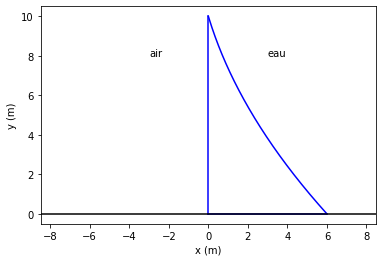

In [8]:
# Ce code permet d'afficher les courbes représentant la digue

H = 10
xe = 6
xa = 0

# On définit les fonctions côté eau et côté air, ici les courbes concaves
a = 3
def feau(y):
    return a * (y / H) ** 2 - (a + xe) * (y / H) + xe
def fair(y):
    return (H - y) * xa / H

# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(feau(y), y, '-b')
plt.plot(fair(y), y, '-b')
plt.plot([xe, xa], [0, 0], '-b')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.text(3, 8, 'eau')
plt.text(-3, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
#plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

e. Calculez, pour $a=3$, $x_a=0$ et $x_e=5$, la résultante des forces de pression, le volume de béton, et le rapport $T/N$ dans l'hypothèse de l'équilibre statique. La digue est-elle en équilibre translationnel ?

In [9]:
def V_digue(xa, xe) : 
    aire_feau = np.array(sp.quad(feau, xa, 0))
    aire_fair = np.array(sp.quad(fair, 0, xe))
    aire_digue = np.add(aire_feau, -aire_fair)
    return aire_digue

m_digue = rho_digue*V_digue(0, 6)

def Peau(H, y): 
    return rho_eau* g* (H - y)

def deriv_Peau(H, xe): 
    return -xe/H 

def Int_milieu(x, y):                      #Calcul intégral méthode point milieu
    N = len(x)
    somme = 0
    for i in range(0, N - 1):
        dx = x[i + 1] - x[i]
        somme = somme + y[i] * dx
    return somme

Fpeau_y = Int_milieu(y, Peau(H, y) * deriv_Peau(H, xe)) 
Fpeau_x = Int_milieu(y, -Peau(H, y)) 

print('Fpeau_y:', Fpeau_y,'Fpeau_x:', Fpeau_x)

Fg = -m_digue*g
#print(Fg)
    
N = Fpeau_y + Fg
T = Fpeau_x

print('N:', N, 'T:', T)
print('T/N:', T/N)

Fpeau_y: -294594.5945945946 Fpeau_x: -490990.99099099095
N: [-294594.59459459 -294594.59459459] T: -490990.99099099095
T/N: [1.66666667 1.66666667]


f. Reprenons le calcul avec $x_e=6$. La digue est-elle en équilibre ? Comparez avec le cas de la pente affine avec $x_a=0$ et $x_e=5$. Laquelle est la plus favorable ?

g. Utilisez une boucle pour calculer le volume et le rapport $T/N$ en faisant varier $x_e$ dans l'intervalle $[5,6]$. On pourra ainsi tracer le rapport $T/N$ en fonction du volume. Déterminez graphiquement le volume minimal pour garder le rapport $T/N$ inférieur à 0.5 dans le cas courbe.

h. Expliquez pourquoi la forme courbe de l'interface aide à réduire le volume de béton nécessaire à garder la digue en équilibre.

## Parenthèse

Nous avons ici omis la deuxième équation d'équilibre statique : le théorème du moment cinétique (ou équilibre du moment des forces dans le cas statique).

Pour vérifier que la digue ne bascule pas sous la pression de l'eau, il faudrait en effet vérifier que le moment des forces qui s'applique à la digue soit nul.

Pour cela, il faudrait :

- trouver le point d'application du poids (le centre de gravité de la digue),
- calculer le moment du poids par rapport à un point,
- calculer la résultante du moment des forces de pression par rapport au même point,
- trouver le point d'application de la réaction du sol qui annule la somme des moments des forces (par rapport à un point quelconque) 
- vérifier que ce point d'application est bien situé quelque part entre la digue et le sol (sinon la digue bascule...)


